# Линейная алгебра: сходство текстов и аппроксимация функций

Данное задание основано на материалах секции, посвященной введению в линейную алгебру. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy и SciPy.

### Вы научитесь:
  * читать тексты из файла с помощью Python и разбивать их на слова
  * переводить тексты в векторные пространства, вычислять расстояния в этих пространствах
  * решать системы линейных уравнений
  * приближать любые функции с помощью многочленов
  
## Введение

В этом задании вы познакомитесь с некоторыми базовыми методами из линейной алгебры, реализованными в пакете SciPy — в частности, с методами подсчета косинусного расстояния и решения систем линейных уравнений. Обе эти задачи еще много раз встретятся нам в специализации. Так, на решении систем линейных уравнений основана настройка линейных моделей — очень большого и важного класса алгоритмов машинного обучения. Косинусное расстояние же часто используется в анализе текстов для измерения сходства между ними.

## Материалы

Справка по функциям пакета scipy.linalg: http://docs.scipy.org/doc/scipy/reference/linalg.html

Справка по работе с файлами в Python: https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files

Справка по регулярным выражениям в Python (если вы захотите узнать про них чуть больше): https://docs.python.org/2/library/re.html

## Задача 1: сравнение предложений

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

  * кошки (животные)
  * UNIX-утилита cat для вывода содержимого файлов
  * версии операционной системы OS X, названные в честь семейства кошачьих
Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

#### Выполните следующие шаги:

1. Скачайте файл с предложениями (sentences.txt).
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n x d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание.
7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

In [1]:
import pandas as pd
import numpy as np
from scipy import spatial
import re

In [2]:
with open('sentences.txt') as input_file:
    sentences = input_file.readlines()

In [3]:
to_low = lambda x: x.strip().lower()
sentences = list(map(to_low, sentences))
num_sentences = len(sentences)
print(num_sentences)

22


In [4]:
sentence_tokens = list(map(lambda s: list(filter(lambda x: x!= '', re.split('[^a-z]', s))), sentences))
print(sentence_tokens)

[['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process'], ['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes'], ['a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output'], ['cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals'], ['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin'], ['the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organism

In [5]:
words = {}
curr_index = 0
for sentence_token in sentence_tokens:
    for token in sentence_token:
        if token not in words:
            words[token] = curr_index
            curr_index += 1

In [6]:
num_words = len(words)
print(words)

{'in': 0, 'comparison': 1, 'to': 2, 'dogs': 3, 'cats': 4, 'have': 5, 'not': 6, 'undergone': 7, 'major': 8, 'changes': 9, 'during': 10, 'the': 11, 'domestication': 12, 'process': 13, 'as': 14, 'cat': 15, 'simply': 16, 'catenates': 17, 'streams': 18, 'of': 19, 'bytes': 20, 'it': 21, 'can': 22, 'be': 23, 'also': 24, 'used': 25, 'concatenate': 26, 'binary': 27, 'files': 28, 'where': 29, 'will': 30, 'just': 31, 'sequence': 32, 'a': 33, 'common': 34, 'interactive': 35, 'use': 36, 'for': 37, 'single': 38, 'file': 39, 'is': 40, 'output': 41, 'content': 42, 'standard': 43, 'hear': 44, 'sounds': 45, 'too': 46, 'faint': 47, 'or': 48, 'high': 49, 'frequency': 50, 'human': 51, 'ears': 52, 'such': 53, 'those': 54, 'made': 55, 'by': 56, 'mice': 57, 'and': 58, 'other': 59, 'small': 60, 'animals': 61, 'one': 62, 'people': 63, 'deliberately': 64, 'tamed': 65, 'artificial': 66, 'selection': 67, 'they': 68, 'were': 69, 'useful': 70, 'predators': 71, 'vermin': 72, 'domesticated': 73, 'its': 74, 'closest': 

In [7]:
matrix = np.zeros((num_sentences, num_words))
print(matrix)
print(matrix.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(22, 254)


In [8]:
for i in range(num_sentences):
    tokens = sentence_tokens[i]
    for token in tokens:
        matrix[i][words[token]] += 1

In [9]:
distances = {}

first_sentence_metric = matrix[0, :]
for i in range(num_sentences):
    cmp_sentence_metric = matrix[i, :]
    
    distances[i] = spatial.distance.cosine(first_sentence_metric, cmp_sentence_metric)   
print(distances)

{0: 0.0, 1: 0.9527544408738466, 2: 0.8644738145642124, 3: 0.8951715163278082, 4: 0.7770887149698589, 5: 0.9402385695332803, 6: 0.7327387580875756, 7: 0.9258750683338899, 8: 0.8842724875284311, 9: 0.9055088817476932, 10: 0.8328165362273942, 11: 0.8804771390665607, 12: 0.8396432548525454, 13: 0.8703592552895671, 14: 0.8740118423302576, 15: 0.9442721787424647, 16: 0.8406361854220809, 17: 0.956644501523794, 18: 0.9442721787424647, 19: 0.8885443574849294, 20: 0.8427572744917122, 21: 0.8250364469440588}


In [10]:
distances_df = pd.DataFrame.from_dict(distances, orient = 'index')
distances_df.columns = ['distance']
distances_df['sentence'] = list(map(lambda x: sentences[x], distances_df.index.values))
print(distances_df)

    distance                                           sentence
0   0.000000  in comparison to dogs, cats have not undergone...
1   0.952754  as cat simply catenates streams of bytes, it c...
2   0.864474  a common interactive use of cat for a single f...
3   0.895172  cats can hear sounds too faint or too high in ...
4   0.777089  in one, people deliberately tamed cats in a pr...
5   0.940239  the domesticated cat and its closest wild ance...
6   0.732739  domestic cats are similar in size to the other...
7   0.925875  however, if the output is piped or redirected,...
8   0.884272  cat with one named file is safer where human e...
9   0.905509  in terms of legibility, a sequence of commands...
10  0.832817  cat command is one of the basic commands that ...
11  0.880477  using cat command, the lines received from std...
12  0.839643  when you type simply cat command without any a...
13  0.870359  leopard was released on october 26, 2007 as th...
14  0.874012  according to apple, leopar

In [11]:
distances_df.sort_values(by='distance')

,distance,sentence
0,0.000000,"in comparison to dogs, cats have not undergone..."
6,0.732739,domestic cats are similar in size to the other...
4,0.777089,"in one, people deliberately tamed cats in a pr..."
21,0.825036,"the fifth major update to mac os x, leopard, c..."
10,0.832817,cat command is one of the basic commands that ...
12,0.839643,when you type simply cat command without any a...
16,0.840636,since apple moved to using intel processors in...
20,0.842757,"mac os x mountain lion installs in place, so y..."
2,0.864474,a common interactive use of cat for a single f...
13,0.870359,"leopard was released on october 26, 2007 as th..."


## Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:


где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [12]:
%matplotlib inline
import math
from matplotlib import pyplot as plt
from scipy import linalg

def f(x):
    return math.sin(x/5.)*math.exp(x/10.) + 5*math.exp(-x/2.) 

In [13]:
x = np.arange(1, 16, 0.1)
print(x)
y = list(map(f, x))
print(y)

[ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3
  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7
  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1
  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5
  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9
  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3
  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7
 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1
 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5
 13.6 13.7 13.8 13.9 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9
 15.  15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9]
[3.252216865271419, 3.128353994472113, 3.012067143378875, 2.902999513100624, 2.800811180666543, 2.7051782592223566, 2.615792099119626, 2.532358527910862, 2.4545971273603557, 2.382240545672994, 2.315033843231158, 2.2527338702133894, 2.1951

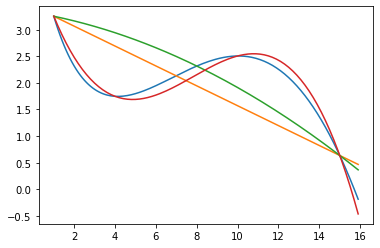

In [22]:
plt.plot(x, y)
plt.plot(x, y_approx_2)
plt.plot(x, y_approx_3)
plt.plot(x, y_approx_4)

In [17]:
def get_matrix(x_points):
    n = len(x_points)
    matrix = []
    for x in x_points:
        row = []
        for i in range(n):
            row.append(x**i)
        matrix.append(row)
    return np.array(matrix)

def get_approximate_values(w, x_points):
    y = []
    for x in x_points:
        y_curr = 0
        for i in range(len(w)):
            y_curr += w[i]*(x ** i)
        y.append(y_curr)
    return y



In [18]:
x_2 = [1, 15]
A_2 = get_matrix(x_2)
y_2 = np.array(list(map(f, x_2)))
w_2 = linalg.solve(A_2, y_2)
y_approx_2 = get_approximate_values(w_2, x) 

In [19]:
x_3 = [1, 8, 15]
A_3 = get_matrix(x_3)
y_3 = np.array(list(map(f, x_3)))
w_3 = linalg.solve(A_3, y_3)
y_approx_3 = get_approximate_values(w_3, x) 

In [20]:
x_4 = [1, 4, 10, 15]
A_4 = get_matrix(x_4)
y_4 = np.array(list(map(f, x_4)))
w_4 = linalg.solve(A_4, y_4)
y_approx_4 = get_approximate_values(w_4, x) 

In [21]:
print(w_4)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]
